In [1]:
#import library

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load data

titanic_data=pd.read_csv("/home/shubham-sakha/Desktop/DataScience/ShubhamProject/titanic.csv")

In [3]:
# Data description

titanic_data.shape

(891, 12)

In [4]:
titanic_data.head()

# Data Description

# survival: Survival (0 = No; 1 = Yes)
# pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
# name: Name
# sex: Sex
# age: Age
# sibsp: Number of Siblings/Spouses Aboard
# parch: Number of Parents/Children Aboard
# ticket: Ticket Number
# fare: Passenger Fare
# cabin: Cabin
# embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Data Cleaning 

titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)

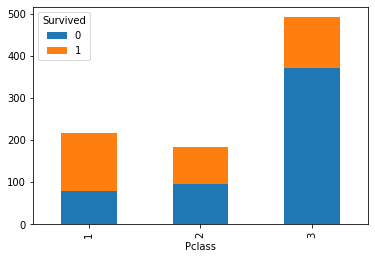

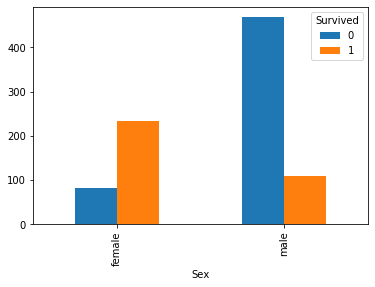

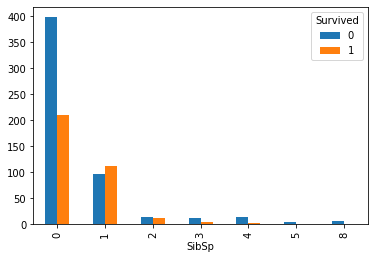

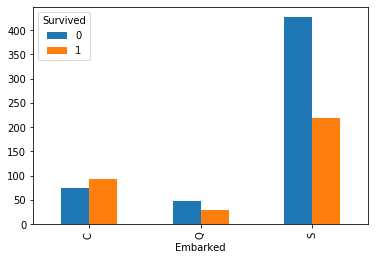

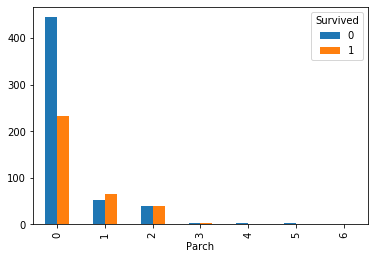

In [8]:
# Exploratory Data analysis

pd.crosstab(titanic_data.Pclass,titanic_data.Survived).plot(kind="bar",stacked=True)
pd.crosstab(titanic_data.Sex,titanic_data.Survived).plot(kind="bar")
pd.crosstab(titanic_data.SibSp,titanic_data.Survived).plot(kind="bar")
pd.crosstab(titanic_data.Embarked,titanic_data.Survived).plot(kind="bar")
pd.crosstab(titanic_data.Parch,titanic_data.Survived).plot(kind="bar")

In [9]:
# Remove Columns not required for training model and save to variable X.
# Target variable y has only data of Survived(1 or 0)

X=titanic_data.drop(['PassengerId','Name','Ticket','Cabin','Survived'],axis="columns")
y=titanic_data.Survived


In [10]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [11]:
# Remove categorical data of sex and Embarked column using pandas dummy .
# steps
# 1) creating dummy variables for each of the columns, 2) concatenate the new columns to the main data frame, 3) drop corresponding categorical columns.

Sex_dummy=pd.get_dummies(X['Sex'])
Embarked_dummy=pd.get_dummies(X['Embarked'])

In [12]:
X=pd.concat([X,Sex_dummy,Embarked_dummy],axis="columns")
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male,C,Q,S
0,3,male,22.0,1,0,7.2500,S,0,1,0,0,1
1,1,female,38.0,1,0,71.2833,C,1,0,1,0,0
2,3,female,26.0,0,0,7.9250,S,1,0,0,0,1
3,1,female,35.0,1,0,53.1000,S,1,0,0,0,1
4,3,male,35.0,0,0,8.0500,S,0,1,0,0,1


In [13]:
X.drop(['Sex','Embarked','S'],inplace=True,axis="columns")
X.head()

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q
0,3,22.0,1,0,7.2500,0,1,0,0
1,1,38.0,1,0,71.2833,1,0,1,0
2,3,26.0,0,0,7.9250,1,0,0,0
3,1,35.0,1,0,53.1000,1,0,0,0
4,3,35.0,0,0,8.0500,0,1,0,0


In [14]:
# model selection and training model .

from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [16]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q
7,3,2.0,3,1,21.0750,0,1,0,0
765,1,51.0,1,0,77.9583,1,0,0,0
339,1,45.0,0,0,35.5000,0,1,0,0
374,3,3.0,3,1,21.0750,1,0,0,0
183,2,1.0,2,1,39.0000,0,1,0,0


In [17]:
y_train.head()

7      0
765    1
339    0
374    0
183    1
Name: Survived, dtype: int64

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=5)
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [22]:
model.score(X_test,y_test)

0.8246268656716418

In [23]:
# draw the tree image

from sklearn import tree

tree.export_graphviz(model,out_file='titanictree.dot',feature_names=X_train.columns,max_depth=3,filled=True)

In [24]:
!dot -Tpng titanictree.dot -o titanictree.png

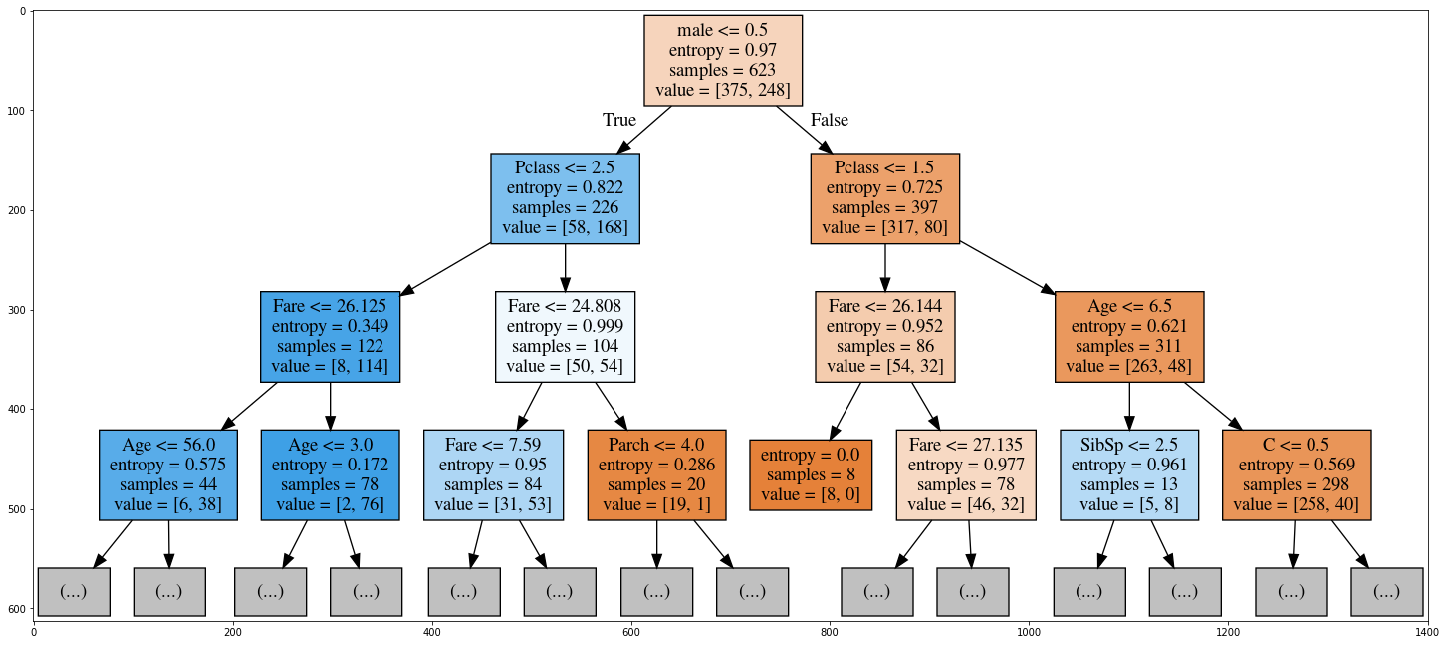

In [25]:
image = plt.imread('titanictree.png')
plt.figure(figsize=(25,25))
plt.imshow(image)

In [26]:
y_predicted=model.predict(X_test)


In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
cm=confusion_matrix(y_test,y_predicted)
cm

array([[152,  22],
       [ 25,  69]])

Text(69.0, 0.5, 'Truth')

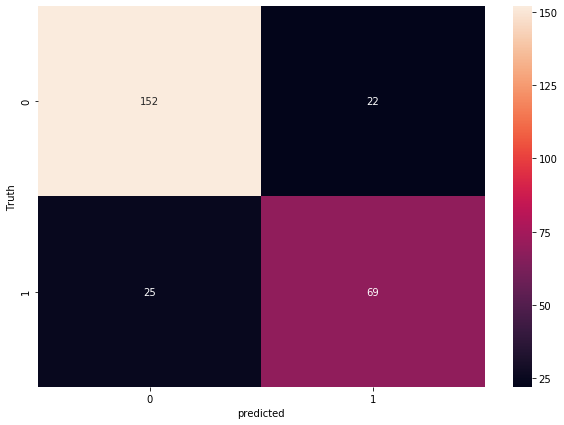

In [32]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='g')
plt.xlabel("predicted")
plt.ylabel("Truth")